In [2]:
%matplotlib inline
import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
from helpers import *
from plots import *
from mf_sgd import *
from baseline_predictions import *
%load_ext autoreload
%autoreload 2

# 1) Load Data

number of items: 10000, number of users: 1000


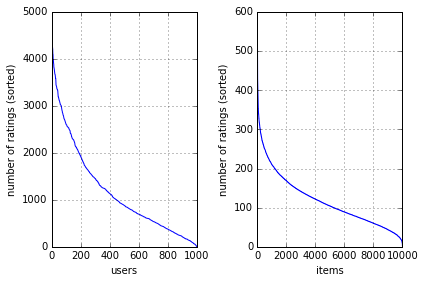

In [3]:
path_dataset = "/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/data_train.csv"
ratings = load_data(path_dataset)

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

# 2) Run biased MF

In [3]:
valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings=0, p_test=0.25)

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:882714
Total number of nonzero elements in test data:294238


In [4]:
from biased_mf_sgd_lois import mf_sgd_biased
lambdas = [0.005]
#lambda_ = 0.07
num_features = 125
gamma = 0.005
num_epochs = 25
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_train, rmse_test = mf_sgd_biased(train, test, num_epochs, gamma, num_features, lambda_)
    rmse_tr.append(rmse_train)
    rmse_te.append(rmse_test)

Learn the matrix factorization using SGD...
iter: 0, RMSE on training set: [ 1.23569164].
RMSE on test data: [ 1.25332762].
iter: 1, RMSE on training set: [ 1.0757374].
RMSE on test data: [ 1.10351194].
iter: 2, RMSE on training set: [ 1.01846997].
RMSE on test data: [ 1.05246479].
iter: 3, RMSE on training set: [ 0.98789433].
RMSE on test data: [ 1.02712216].
iter: 4, RMSE on training set: [ 0.96646058].
RMSE on test data: [ 1.01068462].
iter: 5, RMSE on training set: [ 0.94883257].
RMSE on test data: [ 0.99820346].
iter: 6, RMSE on training set: [ 0.93280087].
RMSE on test data: [ 0.98755322].
iter: 7, RMSE on training set: [ 0.91738953].
RMSE on test data: [ 0.97783639].
iter: 8, RMSE on training set: [ 0.90210574].
RMSE on test data: [ 0.96858859].
iter: 9, RMSE on training set: [ 0.88669991].
RMSE on test data: [ 0.95957212].
iter: 10, RMSE on training set: [ 0.87107959].
RMSE on test data: [ 0.95067536].
iter: 11, RMSE on training set: [ 0.8552364].
RMSE on test data: [ 0.9418559

In [9]:
np.save('rmse_tr_biais_1', rmse_tr)
np.save('rmse_te_biais_1', rmse_te)

In [5]:
rmse_te = np.load('rmse_te_biais.npy')
rmse_tr = np.load('rmse_tr_biais.npy')

In [6]:
from plots import visualization_lambdas
rmse_te_p = []
rmse_tr_p = []
for r in rmse_te:
    rmse_te_p.append(r[24][0])
for r in rmse_tr:
    rmse_tr_p.append(r[24][0])

In [10]:
rmse_te_p = [0.84388059] + rmse_te_p
rmse_tr_p = [0.65641336] + rmse_tr_p

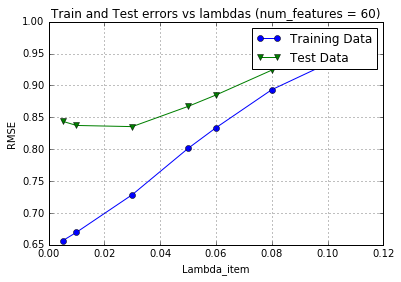

In [12]:
lambdas = [0.005, 0.01, 0.03, 0.05, 0.06, 0.08, 0.1]
#rmse_test = np.load('rmse_test_60.npy')
#rmse_train = np.load('rmse_train_60.npy')
plt.plot(lambdas, rmse_tr_p, marker='o', label='Training Data');
plt.plot(lambdas, rmse_te_p, marker='v', label='Test Data');
plt.title('Train and Test errors vs lambdas (num_features = 60)')
plt.xlabel('Lambda_item');
plt.ylabel('RMSE');
#plt.xscale('log')
plt.legend()
plt.grid()
plt.savefig('rmse_vs_lambdas_item_biais_125')
plt.show()

In [27]:
from sgdpp import mf_sgd_biased
lambda_b = 0.005
lambda_r = 0.015
num_features = 25
gamma = 0.007
num_epochs = 25
rmse_train, rmse_test = mf_sgd_biased(train, test, num_epochs, gamma, num_features, lambda_b, lambda_r)

(10000, 1000)
882714
Learn the matrix factorization using SGD...
Computation 2 in  0.0007949999999254942 s
Computation 2 in  0.0005479999999806751 s
Computation 2 in  0.0012720000001991139 s
Computation 2 in  0.000289000000066153 s
Computation 2 in  0.00023599999985890463 s
Computation 2 in  0.0008089999998901476 s
Computation 2 in  0.00018299999987902993 s
Computation 2 in  0.0005260000000362197 s
Computation 2 in  0.0007970000001478184 s
Computation 2 in  0.00020599999993464735 s
Computation 2 in  0.0016430000000582368 s
Computation 2 in  0.0005909999999857973 s
Computation 2 in  0.000670000000127402 s
Computation 2 in  0.00025600000003578316 s
Computation 2 in  0.00014800000008108327 s
Computation 2 in  0.0001330000000052678 s
Computation 2 in  0.0005989999999655993 s
Computation 2 in  0.0003449999999247666 s
Computation 2 in  0.00012300000003051537 s
Computation 2 in  7.70000001466542e-05 s
Computation 2 in  0.0003280000000813743 s
Computation 2 in  0.001099999999951251 s
Computati

KeyboardInterrupt: 

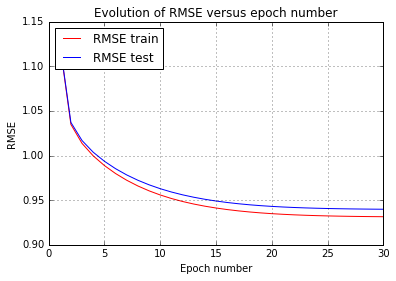

In [12]:
from plots import visualization_rmse_vs_num_epochs
visualization_rmse_vs_num_epochs(num_epochs, rmse_train, rmse_test, "biased_mf")

# 3) Cross validation

## 3.1) num_features 

In [14]:
from biased_mf_sgd import run_mf_biased_cv_num_features
k_fold = 4
num_features = np.arange(10, 200, 10)
num_epochs = 20
lambda_ = 0
rmse_tr, rmse_te = run_mf_biased_cv_num_features(ratings, k_fold, num_epochs, num_features, lambda_)

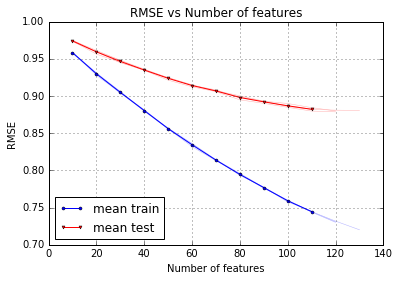

In [7]:
from plots import visualization_num_features
np.save('cv_train_num_features', rmse_tr)
np.save('cv_test_num_features', rmse_te)

visualization_num_features(rmse_tr, rmse_te, num_features, "cv_num_features")

## 3.2) lambda

In [8]:
from biased_mf_sgd_lois import compute_biases
compute_biases(ratings)

(3.8572805008190647,
 matrix([[ -4.77868736e-01,  -3.56338881e-01,  -3.73694642e-01,
            7.91923184e-02,  -2.98149366e-01,   8.25489225e-01,
           -4.10661284e-01,   2.02165615e-02,  -9.55319717e-01,
           -2.11208800e-01,  -5.80593908e-01,  -6.57280501e-01,
           -3.77735046e-01,   5.67205199e-01,  -7.14523820e-01,
           -4.25814470e-01,  -1.19920982e+00,  -1.45526321e+00,
           -3.63947167e-01,  -9.37666353e-01,  -2.99894741e-01,
           -7.59197905e-01,  -5.11904778e-01,  -1.47000127e-01,
           -3.16296894e-01,   2.67215873e-01,  -1.09068770e-01,
           -1.97506065e-01,  -3.04707794e-01,   1.71044355e-03,
           -6.75462319e-01,  -4.16536133e-01,  -4.52174118e-01,
           -4.30931953e-01,  -7.62126316e-01,  -4.27091822e-01,
           -1.31099556e-01,  -8.04502723e-01,  -8.27340381e-01,
           -1.14446106e-01,  -1.02394717e+00,  -3.53243592e-01,
           -2.73503905e-01,  -2.78652693e-01,   1.89248866e-01,
            5.88938

In [11]:
from biased_mf_sgd_lois import run_mf_biased_cv_lambda
k_fold = 2
num_features = 60
num_epochs = 31
lambdas = np.array([0.005, 0.01, 0.03, 0.05, 0.06, 0.08, 0.1])
rmse_tr, rmse_te = run_mf_biased_cv_lambda(ratings, k_fold, num_epochs, num_features, lambdas)

Learn the matrix factorization using SGD...
iter: 0, RMSE on training set: [ 1.16155019].
RMSE on test data: [ 1.18453541].
iter: 1, RMSE on training set: [ 1.05919716].
RMSE on test data: [ 1.09578914].
iter: 2, RMSE on training set: [ 1.01491163].
RMSE on test data: [ 1.06008823].
iter: 3, RMSE on training set: [ 0.99021197].
RMSE on test data: [ 1.04201225].
iter: 4, RMSE on training set: [ 0.97329731].
RMSE on test data: [ 1.03127017].
iter: 5, RMSE on training set: [ 0.96003987].
RMSE on test data: [ 1.02416196].
iter: 6, RMSE on training set: [ 0.9484766].
RMSE on test data: [ 1.01898546].
iter: 7, RMSE on training set: [ 0.9376501].
RMSE on test data: [ 1.01490171].
iter: 8, RMSE on training set: [ 0.92708768].
RMSE on test data: [ 1.01148184].
iter: 9, RMSE on training set: [ 0.91656527].
RMSE on test data: [ 1.00854952].
iter: 10, RMSE on training set: [ 0.90591823].
RMSE on test data: [ 1.00595059].
iter: 11, RMSE on training set: [ 0.89505835].
RMSE on test data: [ 1.0036029

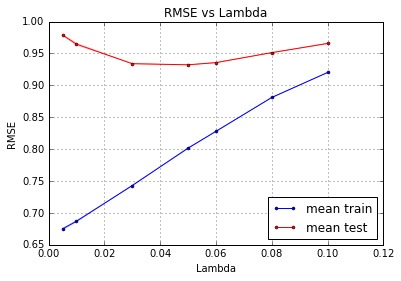

In [12]:
from plots import visualization_lambdas
np.save('cv_train_lambdas_K60_lois', rmse_tr)
np.save('cv_test_lambdas_K60_lois', rmse_te)

visualization_lambdas(rmse_tr, rmse_te, lambdas, "cv_lambdas_K60_lois")

In [13]:
rmse_te.mean(0)

array([ 0.97898809,  0.96463431,  0.9340127 ,  0.93226266,  0.93567481,
        0.95134322,  0.9657226 ])

# 3) make submission

In [ ]:
from biased_mf_sgd import mf_sgd_biased_compute_predictions, compute_biases
mu, user_biases, item_biases = compute_biases(ratings)

X_hat, rmse = mf_sgd_biased_compute_predictions(ratings, 31, 0.005, 60, 0.05, mu, user_biases, item_biases, False)

learn the matrix factorization using SGD...
Starting epoch number 0


In [15]:
from collections import deque
import datetime
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
output_path = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/predictions-%s-group-clm.csv' % now_str

indices = extract_indices('/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/sampleSubmission.csv')

ratings_to_write = deque()
for row, col in indices:
    ratings_to_write.append((row, col, X_hat[row,col]))
    
create_csv_submission(ratings_to_write, output_path)

999   0
